##### Done by Mentor Videsh Jagai; Introduction notebook for Datathon Challenge Dr.Shannon Walker, at beginner Level

In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import shap as shap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from scipy.special import expit as sigmoid  
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost
import catboost
import lightgbm as lightgbm

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)  
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv
/kaggle/input/widsdatathon2024-challenge1/training.csv
/kaggle/input/widsdatathon2024-challenge1/test.csv


In [10]:
!pip install xgboost

In [11]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [88]:
BreastCancer_Train_Data=pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/training.csv',)
BreastCancer_Test_Data=pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/test.csv',)
Sample_Sub=pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv')

In [13]:
BreastCancer_Train_copy = BreastCancer_Train_Data.copy(deep=True)
BreastCancer_Test_copy = BreastCancer_Test_Data.copy(deep=True)

In [14]:
BreastCancer_Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [15]:
BreastCancer_Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           2891 non-null   object 
 2   payer_type                             5032 non-null   object 
 3   patient_state                          5771 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    1777 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

In [16]:
BreastCancer_Train_Data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [17]:
BreastCancer_Test_Data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [18]:
BreastCancer_Train_Data.describe().T.style

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.000000,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,12906.000000,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,12906.000000,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
bmi,3941.000000,28.984539,5.696906,14.000000,24.660000,28.190000,32.920000,85.000000
population,12905.000000,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
density,12905.000000,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.000000
age_median,12905.000000,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.570000
age_under_10,12905.000000,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.675000
age_10_to_19,12905.000000,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.300000
age_20s,12905.000000,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.100000


In [19]:
BreastCancer_Train_Data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [20]:
BreastCancer_Test_Data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,2891,5,White,1606
payer_type,5032,3,COMMERCIAL,2759
patient_state,5771,46,CA,1047
patient_gender,5792,1,F,5792
breast_cancer_diagnosis_code,5792,46,1749,906
breast_cancer_diagnosis_desc,5792,46,"Malignant neoplasm of breast (female), unspeci...",906
metastatic_cancer_diagnosis_code,5792,36,C773,3171
metastatic_first_novel_treatment,11,2,PEMBROLIZUMAB,6
metastatic_first_novel_treatment_type,11,1,Antineoplastics,11
Region,5771,4,South,1840


In [21]:
BreastCancer_Train_Data.head(10)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.750000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.878790,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.683330,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.325580,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,

In [22]:
all_nan_cols = BreastCancer_Train_Data.columns[BreastCancer_Train_Data.isna().any()]
all_nan_cols

Index(['patient_race', 'payer_type', 'patient_state', 'bmi',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_b

In [23]:
for column in BreastCancer_Train_Data.columns:
  NaN_Count = BreastCancer_Train_Data[column].isna().sum()
  if NaN_Count > 0:
    Per_NaN = (NaN_Count/len(BreastCancer_Train_Data))*100
    print(f'{column} : {Per_NaN : .2f}% NaN  Distribution')

patient_race :  49.47% NaN  Distribution
payer_type :  13.97% NaN  Distribution
patient_state :  0.40% NaN  Distribution
bmi :  69.46% NaN  Distribution
metastatic_first_novel_treatment :  99.81% NaN  Distribution
metastatic_first_novel_treatment_type :  99.81% NaN  Distribution
Region :  0.40% NaN  Distribution
Division :  0.40% NaN  Distribution
population :  0.01% NaN  Distribution
density :  0.01% NaN  Distribution
age_median :  0.01% NaN  Distribution
age_under_10 :  0.01% NaN  Distribution
age_10_to_19 :  0.01% NaN  Distribution
age_20s :  0.01% NaN  Distribution
age_30s :  0.01% NaN  Distribution
age_40s :  0.01% NaN  Distribution
age_50s :  0.01% NaN  Distribution
age_60s :  0.01% NaN  Distribution
age_70s :  0.01% NaN  Distribution
age_over_80 :  0.01% NaN  Distribution
male :  0.01% NaN  Distribution
female :  0.01% NaN  Distribution
married :  0.01% NaN  Distribution
divorced :  0.01% NaN  Distribution
never_married :  0.01% NaN  Distribution
widowed :  0.01% NaN  Distributi

- Percentage distribution Nan-Value representation within the Train Breast Cancer Data-Set.

In [24]:
for column in BreastCancer_Test_Data.columns:
  NaN_Count = BreastCancer_Test_Data[column].isna().sum()
  if NaN_Count > 0:
    Per_NaN = (NaN_Count/len(BreastCancer_Test_Data))*100
    print(f'{column} : {Per_NaN : .2f}% NaN  Distribution')

patient_race :  50.09% NaN  Distribution
payer_type :  13.12% NaN  Distribution
patient_state :  0.36% NaN  Distribution
bmi :  69.32% NaN  Distribution
metastatic_first_novel_treatment :  99.81% NaN  Distribution
metastatic_first_novel_treatment_type :  99.81% NaN  Distribution
Region :  0.36% NaN  Distribution
Division :  0.36% NaN  Distribution
family_size :  0.02% NaN  Distribution
family_dual_income :  0.02% NaN  Distribution
income_household_median :  0.02% NaN  Distribution
income_household_under_5 :  0.02% NaN  Distribution
income_household_5_to_10 :  0.02% NaN  Distribution
income_household_10_to_15 :  0.02% NaN  Distribution
income_household_15_to_20 :  0.02% NaN  Distribution
income_household_20_to_25 :  0.02% NaN  Distribution
income_household_25_to_35 :  0.02% NaN  Distribution
income_household_35_to_50 :  0.02% NaN  Distribution
income_household_50_to_75 :  0.02% NaN  Distribution
income_household_75_to_100 :  0.02% NaN  Distribution
income_household_100_to_150 :  0.02% N

In [25]:
Dat_types = BreastCancer_Test_Data.dtypes

# Count the number of unique values for each data type
Uniq_C = Dat_types.value_counts()

# Print the results
print("Data types and their following corresponding count of unique values:")
for Dat_types, count in Uniq_C.items():
    print(f"{Dat_types}: {count}")

Data types and their following corresponding count of unique values:
float64: 68
object: 11
int64: 3


<Axes: >

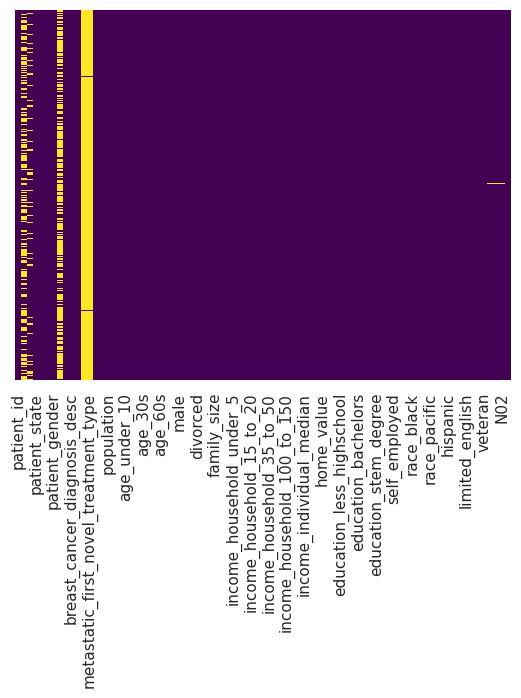

In [26]:
sns.heatmap(BreastCancer_Train_Data.isna(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: >

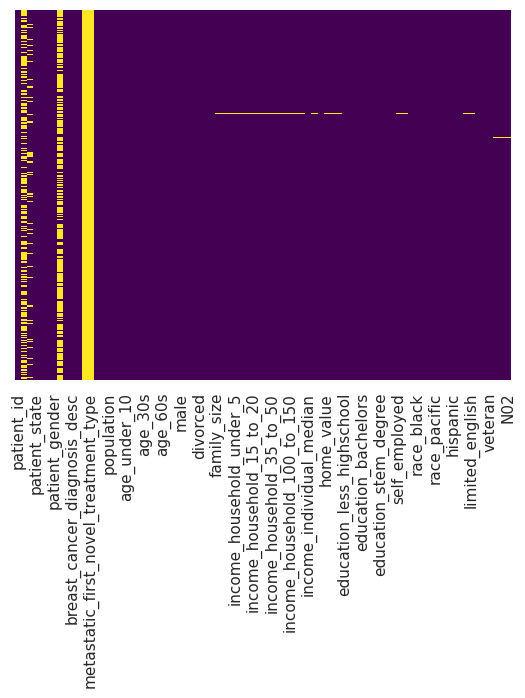

In [27]:
sns.heatmap(BreastCancer_Test_Data.isna(),yticklabels=False,cbar=False,cmap="viridis")

In [28]:
#Let's check unique values in each Categorical column
Cateog_Col = BreastCancer_Train_Data.select_dtypes(include=['object'])

for column in Cateog_Col:
    print(f"The  respective List object column  '{column}':")
    Value_Co = BreastCancer_Train_Data[column].value_counts().head(15)
    Total_Co = len(BreastCancer_Train_Data[column])
    data = []
    
    for Val, Count in Value_Co.items():
        Percen = (Count / Total_Co ) * 100
        data.append([Val, Count, f"{Percen:.3f}%"])
    Hea_Nam = ["ListObject Column", "Count", "Percentage"]
    print(tabulate(data, headers=Hea_Nam, tablefmt="psql"))
    print('=' * 50)


The  respective List object column  'patient_race':
+---------------------+---------+--------------+
| ListObject Column   |   Count | Percentage   |
|---------------------+---------+--------------|
| White               |    3588 | 27.801%      |
| Black               |    1056 | 8.182%       |
| Hispanic            |     829 | 6.423%       |
| Other               |     683 | 5.292%       |
| Asian               |     365 | 2.828%       |
+---------------------+---------+--------------+
The  respective List object column  'payer_type':
+---------------------+---------+--------------+
| ListObject Column   |   Count | Percentage   |
|---------------------+---------+--------------|
| COMMERCIAL          |    6032 | 46.738%      |
| MEDICAID            |    2569 | 19.905%      |
| MEDICARE ADVANTAGE  |    2502 | 19.386%      |
+---------------------+---------+--------------+
The  respective List object column  'patient_state':
+---------------------+---------+--------------+
| ListObject

## Explanatory Data Analysis and Data on Missing Values(NAN) in our Train and Test DataSet.

In [29]:
##Filling in NAN Values with  mean() computation in the Train Breast Cancer Data 
#Set via method Dictionary
Train_NanVal_DataS = [k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>0]
Train_NanVal_DataS 
# The following showcases the list of columns with NAN values accordingly.

['patient_race',
 'payer_type',
 'patient_state',
 'bmi',
 'metastatic_first_novel_treatment',
 'metastatic_first_novel_treatment_type',
 'Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 '

In [30]:
## Percentage Representation of NAN values greater which categorised 50% 
##{:Train_NanVal_DataS} extrapolated Train DataSet.
Train_NanVal_Ov50_DataS = [k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>=0.5] # Filter and categorised columns (>0.5) NAN Values
BreastCancer_Train_Data[Train_NanVal_Ov50_DataS].isna().mean()*100

bmi                                      69.463815
metastatic_first_novel_treatment         99.814040
metastatic_first_novel_treatment_type    99.814040
dtype: float64

In [31]:
## Percentage Representation of NAN values categorised greater 
##than or equal to (>=.50){Test_NanVal_DatS} extrapolated from DataSet.
Test_NanVal_Ov50_DataS = [k for k, v in dict(BreastCancer_Test_Data.isna().mean()).items() if v>=0.5]
BreastCancer_Test_Data[Test_NanVal_Ov50_DataS].isna().mean()*100

patient_race                             50.086326
bmi                                      69.319751
metastatic_first_novel_treatment         99.810083
metastatic_first_novel_treatment_type    99.810083
dtype: float64

In [32]:
BreastCancer_Train_Data[Train_NanVal_Ov50_DataS].isna().mean().reset_index()

,index,0
0,bmi,0.694638
1,metastatic_first_novel_treatment,0.998140
2,metastatic_first_novel_treatment_type,0.998140


In [33]:
BreastCancer_Test_Data[Test_NanVal_Ov50_DataS].isna().mean().reset_index()

,index,0
0,patient_race,0.500863
1,bmi,0.693198
2,metastatic_first_novel_treatment,0.998101
3,metastatic_first_novel_treatment_type,0.998101


Beneficiaries incoporating the library **plotly**

   - **Tip 1**: Enchancement overall background graphical visualisation with usage of template.

   -  **Tip 2**: The incoporation of using HTML in tile/subtilte.
   
   - **Tip 3**: Preparation of DataFrame before generating the chart.

   - **Tip 4**: Formatation of data Label includsion.

   - **Tip 5**: The incorporation to hide x/y title.

   - **Tip 6**: Highlights certain data points.

In [34]:
Train_NanVal_Ov50_Bar_fig = px.bar(BreastCancer_Train_Data[Train_NanVal_Ov50_DataS].isna().mean().reset_index(), title="Train columns greater than or equal to (>=.50) of NAN Values",text_auto=True,template='seaborn', x='index', y=0, labels={'index':'Train_Data_ListColumns','0':'NaN-Value Distribution'})
Train_NanVal_Ov50_Bar_fig

In [35]:
Test_NanVal_Ov50_Bar_fig= px.bar(BreastCancer_Test_Data[Test_NanVal_Ov50_DataS].isna().mean().reset_index(), x='index', text_auto=True, y=0, template='seaborn', labels={'index':'Test_Data_List Columns','0':'Nan Value Distribution'})
Test_NanVal_Ov50_Bar_fig

- Filtering of both Train and Test DataSet whereby categorising less than (<.01) NaN-value Distrbibution.

In [36]:
Train_NanVal_Les01_DataS=[k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>0 and v<0.01]
BreastCancer_Train_Data[Train_NanVal_Les01_DataS].isna().mean()*100

patient_state       0.395165
Region              0.402913
Division            0.402913
population          0.007748
density             0.007748
                      ...   
health_uninsured    0.007748
veteran             0.007748
Ozone               0.224702
PM25                0.224702
N02                 0.224702
Length: 70, dtype: float64

In [37]:
BreastCancer_Train_Data[Train_NanVal_Les01_DataS].isna().mean().reset_index()

,index,0
0,patient_state,0.003952
1,Region,0.004029
2,Division,0.004029
3,population,0.000077
4,density,0.000077
...,...,...
65,health_uninsured,0.000077
66,veteran,0.000077
67,Ozone,0.002247
68,PM25,0.002247


In [38]:
Test_NanVal_Les01_DataS=[k for k, v in dict(BreastCancer_Test_Data.isna().mean()).items() if v>0 and v<0.01]
BreastCancer_Test_Data[Test_NanVal_Les01_DataS].isna().mean()*100

patient_state                  0.362569
Region                         0.362569
Division                       0.362569
family_size                    0.017265
family_dual_income             0.017265
income_household_median        0.017265
income_household_under_5       0.017265
income_household_5_to_10       0.017265
income_household_10_to_15      0.017265
income_household_15_to_20      0.017265
income_household_20_to_25      0.017265
income_household_25_to_35      0.017265
income_household_35_to_50      0.017265
income_household_50_to_75      0.017265
income_household_75_to_100     0.017265
income_household_100_to_150    0.017265
income_household_150_over      0.017265
income_household_six_figure    0.017265
home_ownership                 0.017265
home_value                     0.017265
rent_median                    0.017265
rent_burden                    0.017265
self_employed                  0.017265
farmer                         0.017265
poverty                        0.017265


In [39]:
BreastCancer_Test_Data[Test_NanVal_Les01_DataS].isna().mean().reset_index()

,index,0
0,patient_state,0.003626
1,Region,0.003626
2,Division,0.003626
3,family_size,0.000173
4,family_dual_income,0.000173
5,income_household_median,0.000173
6,income_household_under_5,0.000173
7,income_household_5_to_10,0.000173
8,income_household_10_to_15,0.000173
9,income_household_15_to_20,0.000173


- Graphical Representation of BreastCancer Train & Test DataSets particularly, numerical classification, of **NaN-Values** (<.01) within the list object columns.

In [40]:
Train_NanVal_Les01_Bar_fig=px.bar(BreastCancer_Train_Data[Train_NanVal_Les01_DataS].isna().mean().reset_index(), text_auto=True,title='Train Columns less than 1% of NAN Values', template='seaborn', x='index', y=0, labels={'index':'Train_Data_ListColumn','0':'Nan-Value Distribution'})
Train_NanVal_Les01_Bar_fig

In [41]:
Test_NanVal_Les01_DataS_Bar_fig= px.bar(BreastCancer_Test_Data[Test_NanVal_Les01_DataS].isna().mean().reset_index(),x='index',y=0, title='Test Columns with Less than 1% of NAN-Value Distribution', template='seaborn', labels={'index':'Test_Data_ListColumns', '0':'Nan-Value Distribution' })
Test_NanVal_Les01_DataS_Bar_fig

- Investigational Analysis on the Categorical Classification of both Train and Test Data-Set within the NAN-Value Distribution.

In [42]:
Train_NanVal_Les50_DataS=[k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>0 and v<0.5]
BreastCancer_Train_Data[Train_NanVal_Les50_DataS].isna().mean()*100

patient_race        49.473113
payer_type          13.970246
patient_state        0.395165
Region               0.402913
Division             0.402913
                      ...    
health_uninsured     0.007748
veteran              0.007748
Ozone                0.224702
PM25                 0.224702
N02                  0.224702
Length: 72, dtype: float64

In [43]:
Nan_Ov50ValDis_Categ_Feat_= BreastCancer_Train_Data[Train_NanVal_Les50_DataS].select_dtypes('object').columns.to_list()


In [44]:
for x in Nan_Ov50ValDis_Categ_Feat_:
    print('BreastCancer_Train_Data',x,BreastCancer_Train_Data[x].unique())

BreastCancer_Train_Data patient_race [nan 'White' 'Other' 'Hispanic' 'Asian' 'Black']
BreastCancer_Train_Data payer_type ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE' nan]
BreastCancer_Train_Data patient_state ['CA' 'TX' 'ID' 'NY' 'IL' nan 'MI' 'OR' 'MT' 'KY' 'OH' 'IN' 'FL' 'CO' 'GA'
 'VA' 'MD' 'KS' 'WI' 'PA' 'NM' 'WA' 'MN' 'NC' 'AL' 'SC' 'LA' 'IA' 'TN'
 'HI' 'NE' 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'ND' 'OK' 'WY' 'DE'
 'NJ' 'MS' 'AK' 'PR' 'RI' 'CT' 'NH' 'MA']
BreastCancer_Train_Data Region ['West' 'South' 'Northeast' 'Midwest' nan]
BreastCancer_Train_Data Division ['Pacific' 'West South Central' 'Mountain' 'Middle Atlantic'
 'East North Central' nan 'East South Central' 'South Atlantic'
 'West North Central' 'New England']


In [45]:
BreastCancer_Train_Data[Nan_Ov50ValDis_Categ_Feat_].describe()

,patient_race,payer_type,patient_state,Region,Division
count,6521,11103,12855,12854,12854
unique,5,3,50,4,9
top,White,COMMERCIAL,CA,South,East North Central
freq,3588,6032,2438,3919,2923


##### Exploration and visulisation underlying relationships  factors of the patient Scio-econonmic status [**Demographic Data**],Racial Lineage, Age Grouping, BMI [**Characteristics Data**] in addition the air quality data(e.g.Ozone, PM25 and NO2) [**Environmental Condition**].

- As such, keeping the patient's Diagnosis Period{DiagPeriodL90D(:**Target Variable)** along the y-axis since its the predictor variable for this project. This variable indicates diagonsis period whereby cancer diagnoses with less than 90 days(Yes: 1,No: 0)

[Categorised Representation] of **Target variable**.

- Hence the above critical covariates features column  aforementioned above; i) **demographic**,ii) **charactertics**, iii) **environmental conditions** influence or intercept the peatient's diagnosis treatment period accordingly.Therefore, such invetigation and conductions emerged from such particular features found the most variance on the treatment Diagnosis period.

In [89]:
#Exploration of patient whose within 90 days or less(:<90 ) diagnosis treatment period[Target Variable in our DataSet].
# Exploit the distribution percentage of Target Vriable in our DataSet.
print(BreastCancer_Train_Data['DiagPeriodL90D'].value_counts(normalize=True)*100)

DiagPeriodL90D
1    62.451573
0    37.548427
Name: proportion, dtype: float64


([<matplotlib.axis.YTick at 0x7f823e6a0f40>,
 [Text(0, 0, 'Diag_Period_Less90D'), Text(0, 1, 'Diag_Period_Greater_90D')])

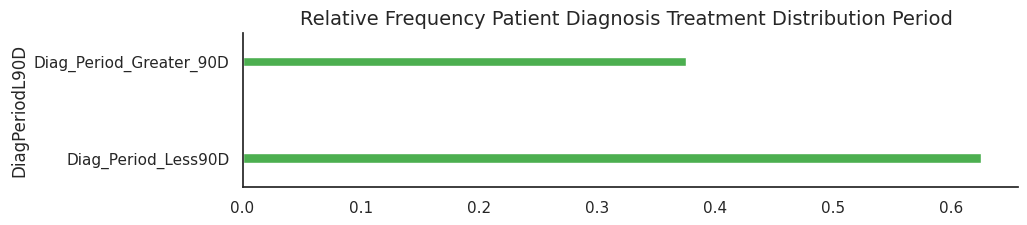

In [90]:
#Horizontal Barplot showcasing Relative Frequency Patient Diagnosis Treatmentment Distribution of unique values.
BreastCancer_Train_Data['DiagPeriodL90D'].value_counts(normalize=True).plot(kind='barh',color='#4CAF50',width=0.1,figsize=(10,2)).spines[['top', 'right']].set_visible(False)
plt.title('Relative Frequency Patient Diagnosis Treatment Distribution Period ',fontsize=14)
plt.yticks(ticks=[0,1],labels=['Diag_Period_Less90D','Diag_Period_Greater_90D'])

##### Overview of the Target Variable **DiagPeriodL90D** in accordance with the Patient's age (**patient_age**) whom either remained within or less than or preached over the Diagnosis Treatment Period of 90 days.

In [91]:
PatAge_F =BreastCancer_Train_Data[['DiagPeriodL90D','patient_age']].groupby('DiagPeriodL90D').value_counts()
PatAge_F

DiagPeriodL90D  patient_age
0               82             297
                63             194
                60             187
                62             178
                58             174
                              ... 
1               23               5
                24               5
                25               5
                20               4
                21               3
Name: count, Length: 129, dtype: int64

#### Distribution of Patient in accordance Treatment Distrbution Period that within the  fixed 90 days period or less...

In [93]:
BreastCancer_FiltDiaPL90 = BreastCancer_Train_Data[BreastCancer_Train_Data['DiagPeriodL90D']==1]


#### Distribution of Patient in accordance Treatment Distrbution Period that preached over the 90 days period..

In [94]:
BreastCancer_FiltDiaOv90 = BreastCancer_Train_Data[BreastCancer_Train_Data['DiagPeriodL90D']==0]

### Age Distribution of Patients within Diagnosis Treatment Period of <90 days.

In [95]:
Per_AgeDiagPerL90=BreastCancer_FiltDiaPL90.patient_age.value_counts(normalize=True)*100
Per_AgeDiagPerL90

patient_age
64    3.784119
59    3.548387
57    3.535980
60    3.523573
61    3.511166
        ...   
25    0.062035
24    0.062035
19    0.062035
20    0.049628
21    0.037221
Name: proportion, Length: 67, dtype: float64

#### Relative Frequency Distribution Percentage of the Diagnosis Treatment preached Treatment Period.

In [96]:
Per_AgeDiagPerOv90=BreastCancer_FiltDiaOv90.patient_age.value_counts(normalize=True)*100
Per_AgeDiagPerOv90

patient_age
82    6.128766
63    4.003302
60    3.858853
62    3.673132
58    3.590590
        ...   
79    0.103178
25    0.082542
24    0.082542
26    0.020636
23    0.020636
Name: proportion, Length: 62, dtype: float64

### Age Distribution of Patients within Diagnosis Treatment Period of <90 days.


In [97]:
## Age Distribution of Patients within Diagnosis Treatment Period of <90 days.
Fig_Rel_FreqDis_PatAg= px.bar(Per_AgeDiagPerL90, text_auto=True, labels={'index':'patient_age','value':'Relative Frequency Value Distribution'}, title='Age Distribution of Patients within Diagnosis Treatment Period of <90 days',)
Fig_Rel_FreqDis_PatAg

## Age Distribution of Patients preaching Diagnosis Treatment Period of >90 days.


In [98]:
## Age Distribution of Patients preaching Diagnosis Treatment Period of >90 days.
Fig_Rel_FreqDis_OvPatAg= px.bar(Per_AgeDiagPerOv90,text_auto=True, labels={'index':'patient_age','value':'Relative Frequency Value Distribution'}, title='Age Distribution of Patients within Diagnosis Treatment Period of <90 days', barmode="relative",)
Fig_Rel_FreqDis_OvPatAg

In [99]:
PatRac_F= BreastCancer_Train_Data[['DiagPeriodL90D','patient_race']].groupby('DiagPeriodL90D').value_counts()
PatRac_F

DiagPeriodL90D  patient_race
0               White           1223
                Black            408
                Hispanic         305
                Other            255
                Asian            135
1               White           2365
                Black            648
                Hispanic         524
                Other            428
                Asian            230
Name: count, dtype: int64

## Data Preparation:

- Explore Missing Values.

- Impute Missing Values
    - K-nearest neighbors, regression imputation

In [100]:
#Dropping high nulls columns
for column in BreastCancer_Train_Data.columns:
    Null_C = BreastCancer_Train_Data[column].isnull().sum()
    percent_nulls = (Null_C / BreastCancer_Train_Data.shape[0]) * 100
    if percent_nulls > 65 : ## Null Percentage distribution greater (>45%)
        BreastCancer_Train_Data.drop(columns = column,axis = 1,inplace=True)
        BreastCancer_Test_Data.drop(columns = column,axis = 1,inplace=True)

In [101]:
#checking that test and train has the same shape
print(f"Train data: {BreastCancer_Train_Data.shape} \nTest data: {BreastCancer_Test_Data.shape}")

Train data: (12906, 80) 
Test data: (5792, 79)


## **NOTE**
- the columns with > 45% missing values are: **['patient_race', 'bmi', 'metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']**

#### Impute Missing Values: 

- The method of handling missing data in data preprocessing journey, exploration of various distinctive techniques effectively imputing missing data with the primal focus both numerical and categorical features.

- This essential method (**Imputation**) becomes a effective idealistic solution when deaing with columns that contain relatively few missing values accordingly. It fundamentally reassures the completeness of the dataset, ensuring that valuable information isn't disposed/lost accordingly. 

   - For **numerical features**:
   
     - This is configured to utlised the median as the median strategym however it underscored that numerous strategies utlised as such: {**mean,constant,custom values**}.
     
       - Other imputation methods such as IterativeImputer and KNNImputer can be explored, these such methods offer flexibility based on nature of your dataset.  
     
    - For **categorical features**:
    
      - Categorical features,by analyzing missing values in each distinctive column by filling with the label 'unknown'. This such approach preserves the integrity of the data in addition permits seamless handling of missing categorical information.





In [102]:
# Identify categorical and numerical features
Tr_Categorical_ColFea = BreastCancer_Train_Data.select_dtypes(include=['object']).columns
Tr_Numerical_ColFea = BreastCancer_Train_Data.select_dtypes('number')

In [103]:
# Investigation of columns with missing values
Missing_Col = [Col for Col in BreastCancer_Train_Data.columns if BreastCancer_Train_Data[Col].isnull().any()]

# Determining by counting the number of missing values per column
MissVal_C = BreastCancer_Train_Data.isna().sum()

In [104]:


# Generation of a DataFrame with columns and their assiociating  missing values count 
MissingVal_DF= pd.DataFrame(MissVal_C.rename('Total_Missing_Values_')).loc[MissVal_C.ne(0)]


# Generation of a function getting the intersection of two lists
def Inters(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3


In [105]:
# Find missing columns that are categorical or numerical
Categ_M = Inters(Missing_Col, Tr_Categorical_ColFea)
Numer_M = Inters(Missing_Col, Tr_Numerical_ColFea)

# Imputation of following missing values in categorical features
if len(Categ_M) > 0:
    Categ_Imouter = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="unknown")
    BreastCancer_Train_Data[Categ_M] = Categ_Imouter.fit_transform(BreastCancer_Train_Data[Categ_M])
    BreastCancer_Test_Data[Categ_M] = Categ_Imouter.fit_transform(BreastCancer_Test_Data[Categ_M])



In [106]:
# Use Simple Imputer for numerical features (using median as an example)
Numer_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
BreastCancer_Train_Data[Numer_M] = Numer_imputer.fit_transform(BreastCancer_Train_Data[Numer_M])
BreastCancer_Test_Data[Numer_M] = Numer_imputer.fit_transform(BreastCancer_Test_Data[Numer_M])

In [107]:
# Check for missing values after imputation
print(BreastCancer_Train_Data.isna().sum().T)
print(BreastCancer_Test_Data.isna().sum().T)

patient_id        0
patient_race      0
payer_type        0
patient_state     0
patient_zip3      0
                 ..
veteran           0
Ozone             0
PM25              0
N02               0
DiagPeriodL90D    0
Length: 80, dtype: int64
patient_id          0
patient_race        0
payer_type          0
patient_state       0
patient_zip3        0
                   ..
health_uninsured    0
veteran             0
Ozone               0
PM25                0
N02                 0
Length: 79, dtype: int64


### Visulisation of categorical features for both Train and test BreastCancer Dataset accorindlingly.

In [108]:

def Categ_Dist(BreastCancer_Train_Data, BreastCancer_Test_Data, Tr_Categorical_ColFea):
    for Feat in Tr_Categorical_ColFea:
        plt.figure(figsize=(25, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(data=BreastCancer_Train_Data, x=Feat, palette='viridis')
        plt.title(f'BreastCancer Training Set - {Feat} Distribution')

        plt.subplot(1, 2, 2)
        sns.countplot(data=BreastCancer_Test_Data, x=Feat, palette='viridis')
        plt.title(f'BreastCancer Testing Set - {Feat} Distribution')

        # Set rotation for x-axis labels
        for label in plt.gca().get_xticklabels():
            label.set_rotation(90)

        plt.show()
        

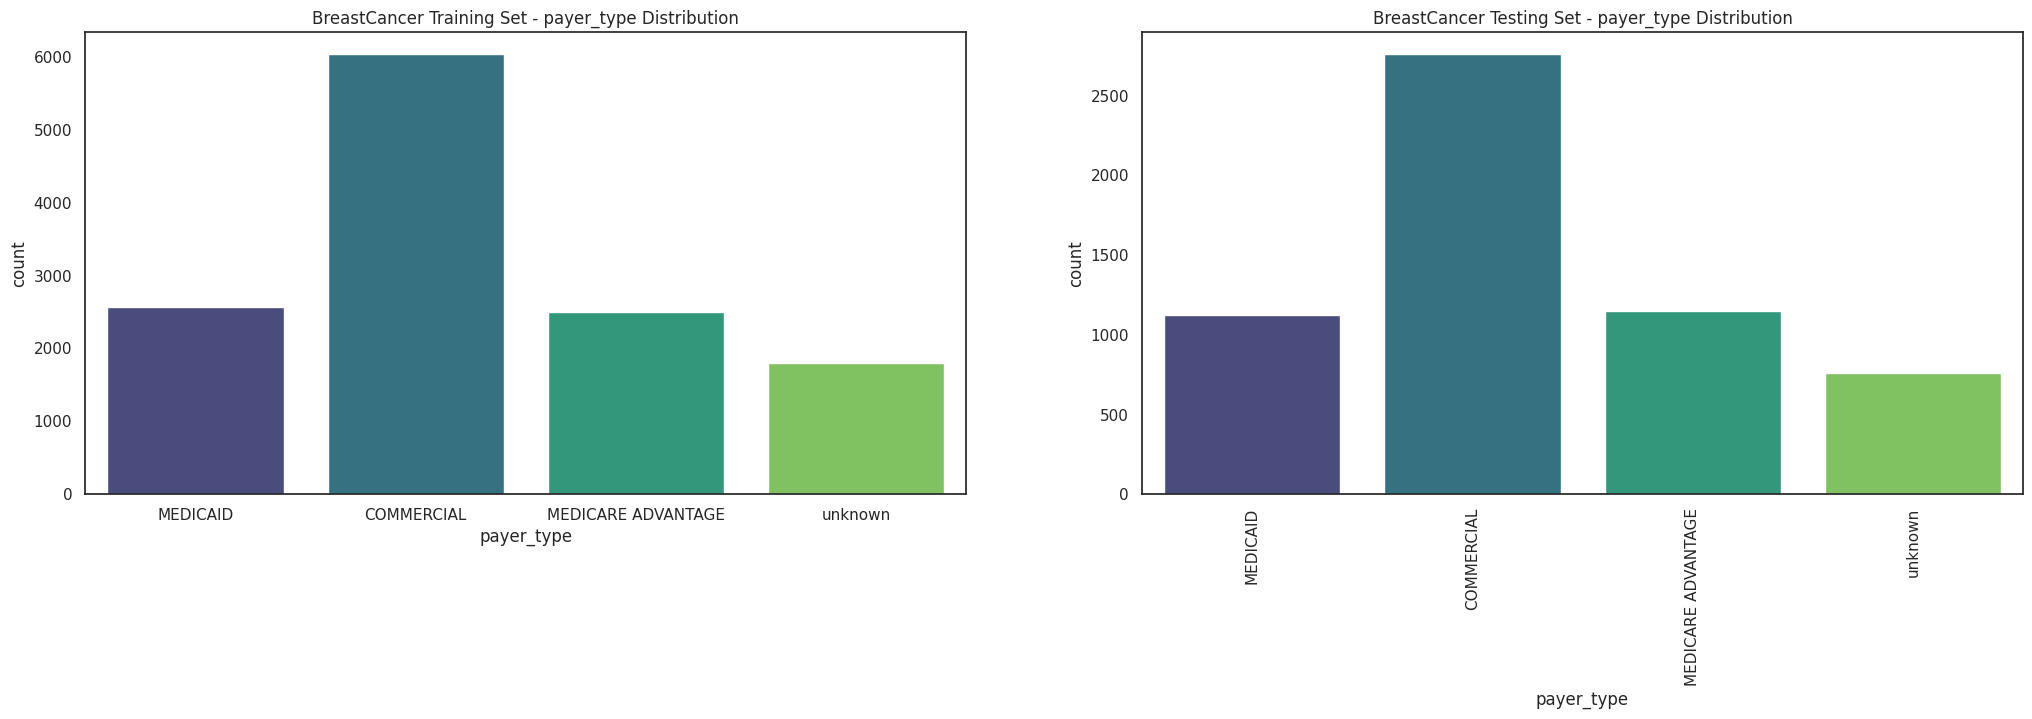

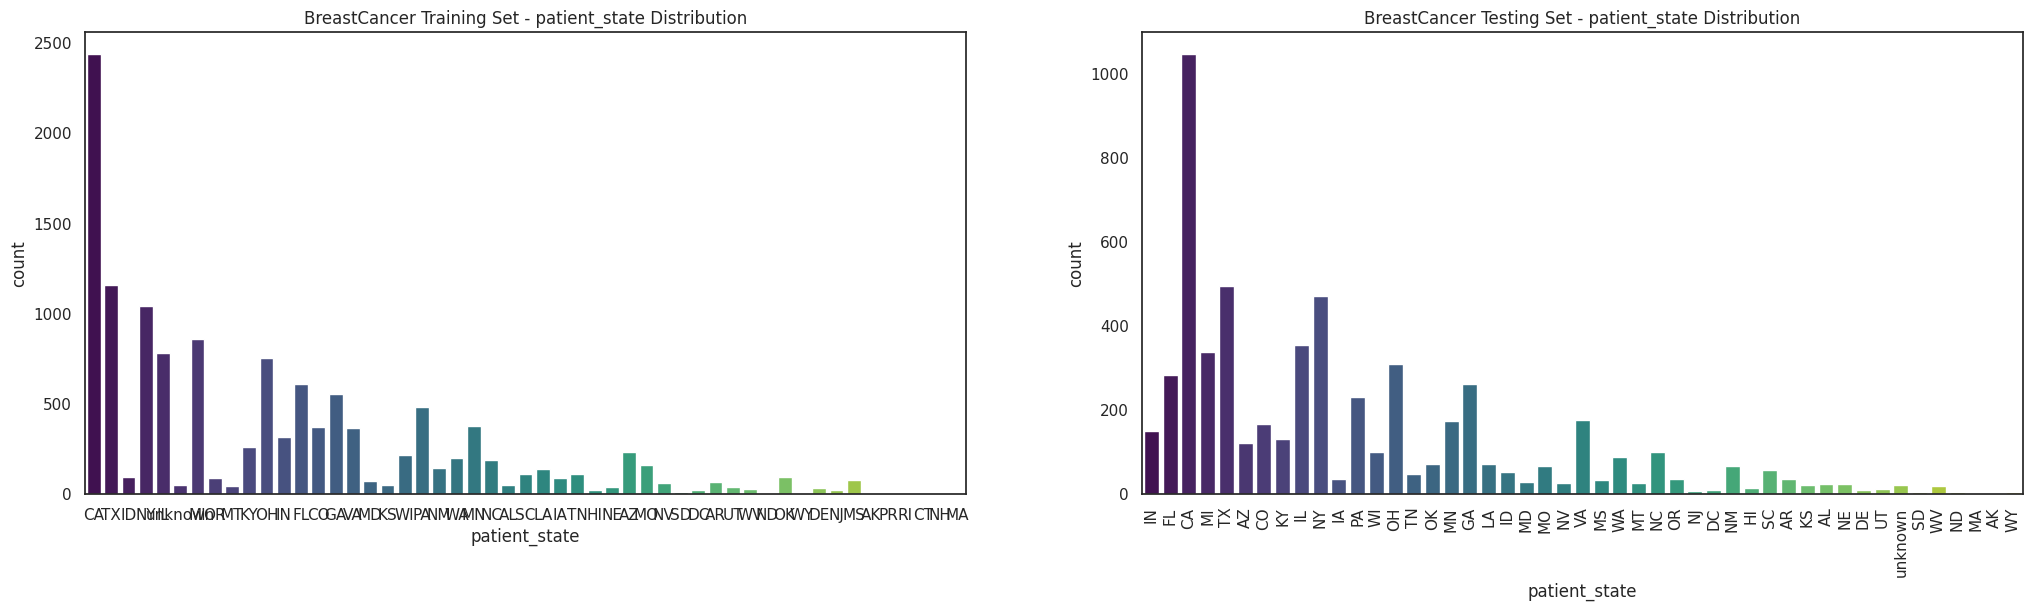

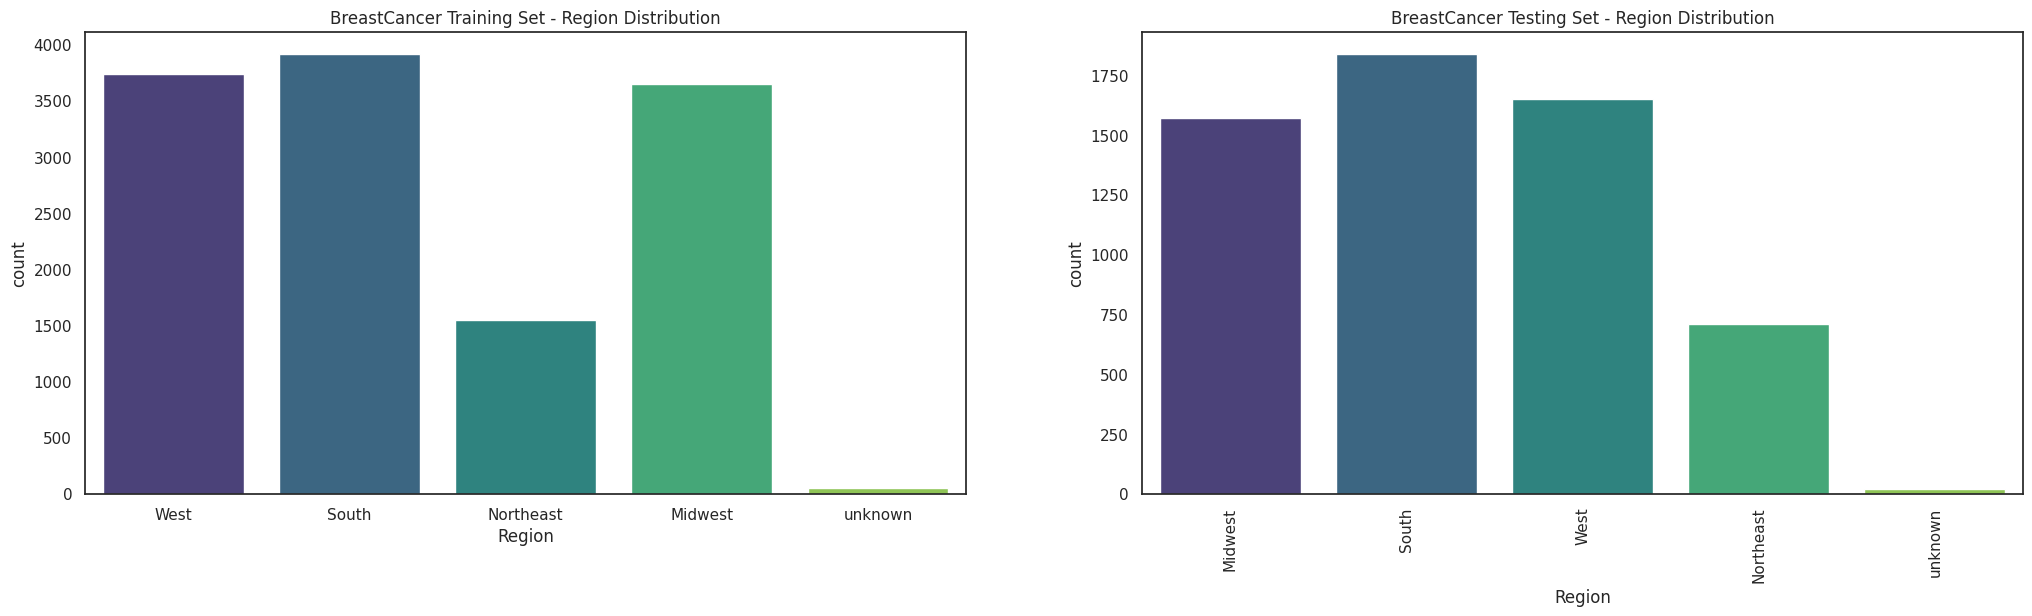

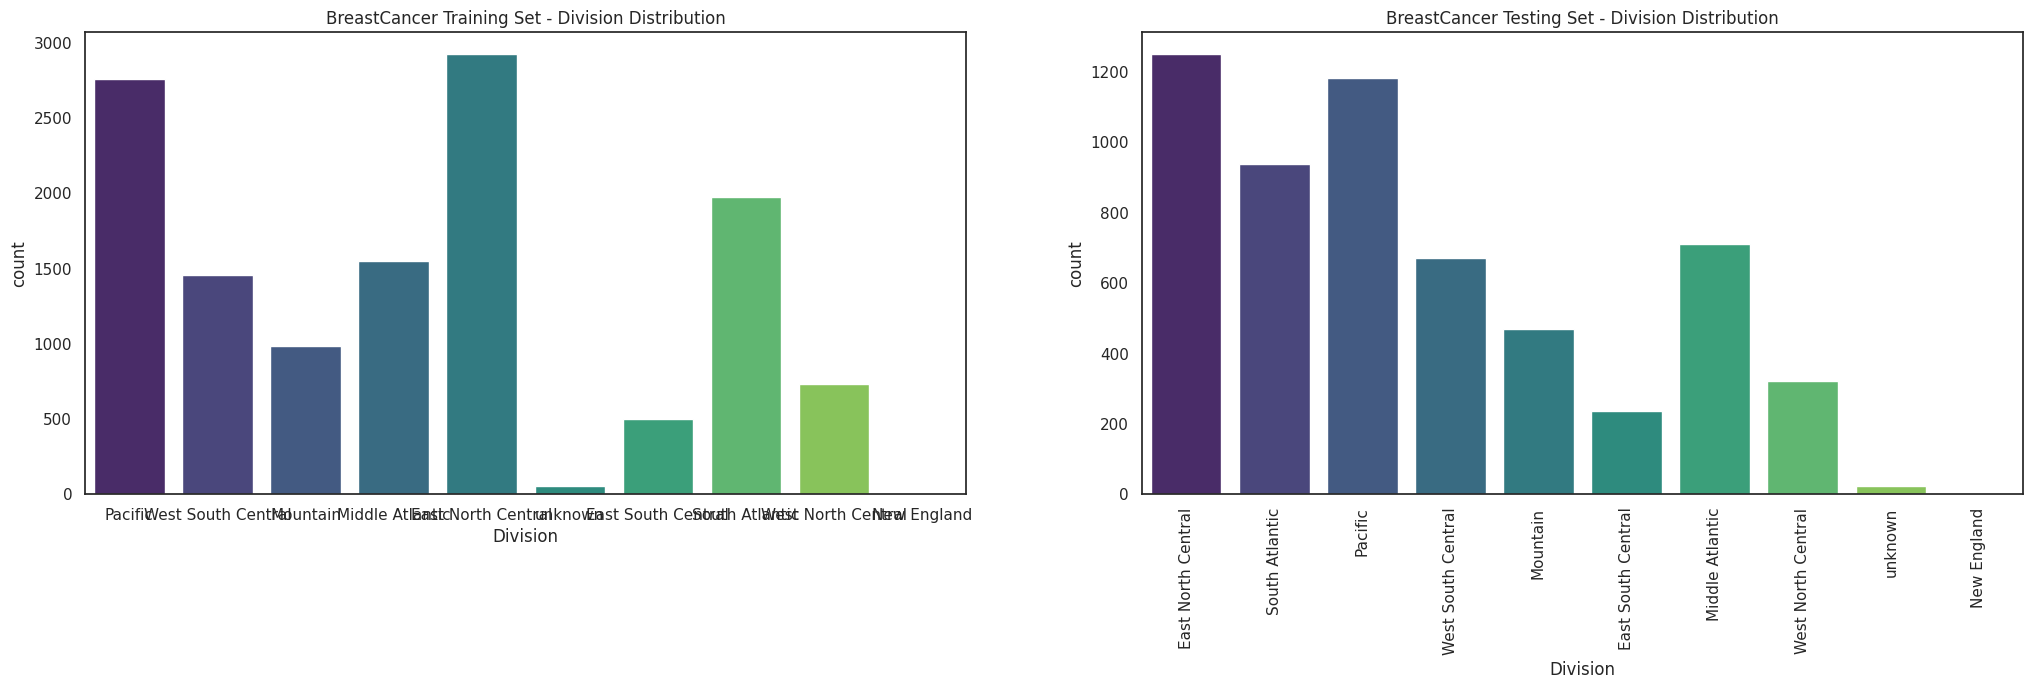

In [109]:
# List of categorical features
Cateo_feat = ['payer_type','patient_state', 'Region', 'Division']

# Plot the distribution
Categ_Dist(BreastCancer_Train_Data,BreastCancer_Test_Data ,Cateo_feat )

### Normalization and Data Encoding:

- Encoding Cateogorical Features.

  - Enabling machine learning algorithms to process categorical features, we incorporate the LabelEncoder from scikit-learn. 

- The following categorical features are encoded:


In [110]:
Tr_Categorical_ColFea

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'Region', 'Division'],
      dtype='object')

In [111]:
label_En = LabelEncoder()

for x in Tr_Categorical_ColFea:
    BreastCancer_Train_Data[x] = label_En.fit_transform(BreastCancer_Train_Data[x])
    BreastCancer_Test_Data[x] = label_En.fit_transform(BreastCancer_Test_Data[x])

In [112]:
 Target_F = Tr_Categorical_ColFea
for x in Target_F:
    print(f"\n The following Unique Val: {x} after encoding:")
    print(BreastCancer_Train_Data[x].unique())
    print("************************************\n")


 The following Unique Val: patient_race after encoding:
[5 4 3 2 0 1]
************************************


 The following Unique Val: payer_type after encoding:
[1 0 2 3]
************************************


 The following Unique Val: patient_state after encoding:
[ 4 43 13 33 14 50 21 36 25 17 34 15  9  5 10 45 20 16 47 37 31 46 22 26
  1 40 18 12 42 11 28  3 23 32 41  7  2 44 48 27 35 49  8 30 24  0 38 39
  6 29 19]
************************************


 The following Unique Val: patient_gender after encoding:
[0]
************************************


 The following Unique Val: breast_cancer_diagnosis_code after encoding:
[48 29 18 22  7 47 35  3 30 42 46 26 25 17  0 45 41  6 34  2 21 12 33 13
 31  1 37 38 19 43  5 28 39  9 40  4 23 27 14 36 49 15 20 16 24 44 10  8
 11 32]
************************************


 The following Unique Val: breast_cancer_diagnosis_desc after encoding:
[42 12 23  4 18 44  2 48  6 38 41  0  9 24 22 20 39 36 10 27 11 32 28 31
  8 46 15 14 25 40 13 4

### Feature Engineering


- Scaling  numerical features ensures that they contribute equally throughout the model accoridngly. The incorporation of logarithmic or square roots transformation are benefical to normalisation of the distribution of features respectively.


In [113]:
#Discarding columns with low variance accordingly..

def Rem_feature_LF(datFr, threshold=0.1):
    for x in datFr.x:
        if datFr[x].std() < threshold:
            datFr = datFr.drop([x], axis=1)
    return datFr

In [114]:
Tr_Numerical_ColFea = BreastCancer_Train_Data.select_dtypes('number').columns

In [115]:
#Discarding  correlations

Drop_Col = []

Numer_Feat_C = [x for x in Tr_Numerical_ColFea]


In [116]:

# Create correlation matrix
corr_matrix = BreastCancer_Train_Data[Numer_Feat_C].corr().abs()
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Allocating the index of feature column of both test and train Dataset. 
Drop_Corgr_098 = [column for column in upper.columns if any(upper[column] > 0.98)]
## Removal of column with correlation greater then 0.98 respectively train DataSet..
BreastCancer_Train_Data.drop(Drop_Corgr_098, inplace=True, axis=1)

## Removal of column with correlation greater then 0.98 respectively test DataSet..

BreastCancer_Test_Data.drop(Drop_Corgr_098, inplace=True, axis=1)

In [117]:
#Separating the target variable
Tempor_T = BreastCancer_Test_Data
Tar_C = BreastCancer_Train_Data["DiagPeriodL90D"]
Numer_OnCol = BreastCancer_Train_Data.drop(["DiagPeriodL90D"],axis =1) 
Col_Num_Nam = Numer_OnCol.columns

In [118]:
## Standardization of our the data accoridningly.

Scaler = StandardScaler()
Numer_OnCol_Sc = Scaler.fit_transform(Numer_OnCol)
TestDat_Sc = Scaler.transform(BreastCancer_Test_Data)

## Feature Selection techniques:

- i) This is essential as it fundamentally incorporates in enhancing model performance, improve in interpretability and reduction in overfitting.


In [119]:
from sklearn.linear_model import LassoCV
Lasso_ = LassoCV().fit(Numer_OnCol_Sc, Tar_C)
Imp = np.abs(Lasso_.coef_)
Feat_Na = np.array(Col_Num_Nam)

feat_ind = np.argsort(Imp)[::-1]
totlasso = 20
Feat_imp = pd.DataFrame(columns=['Value','Feature'])
Feat_imp.loc[:,'Value'] = Imp
Feat_imp.loc[:,'Feature'] = Col_Num_Nam


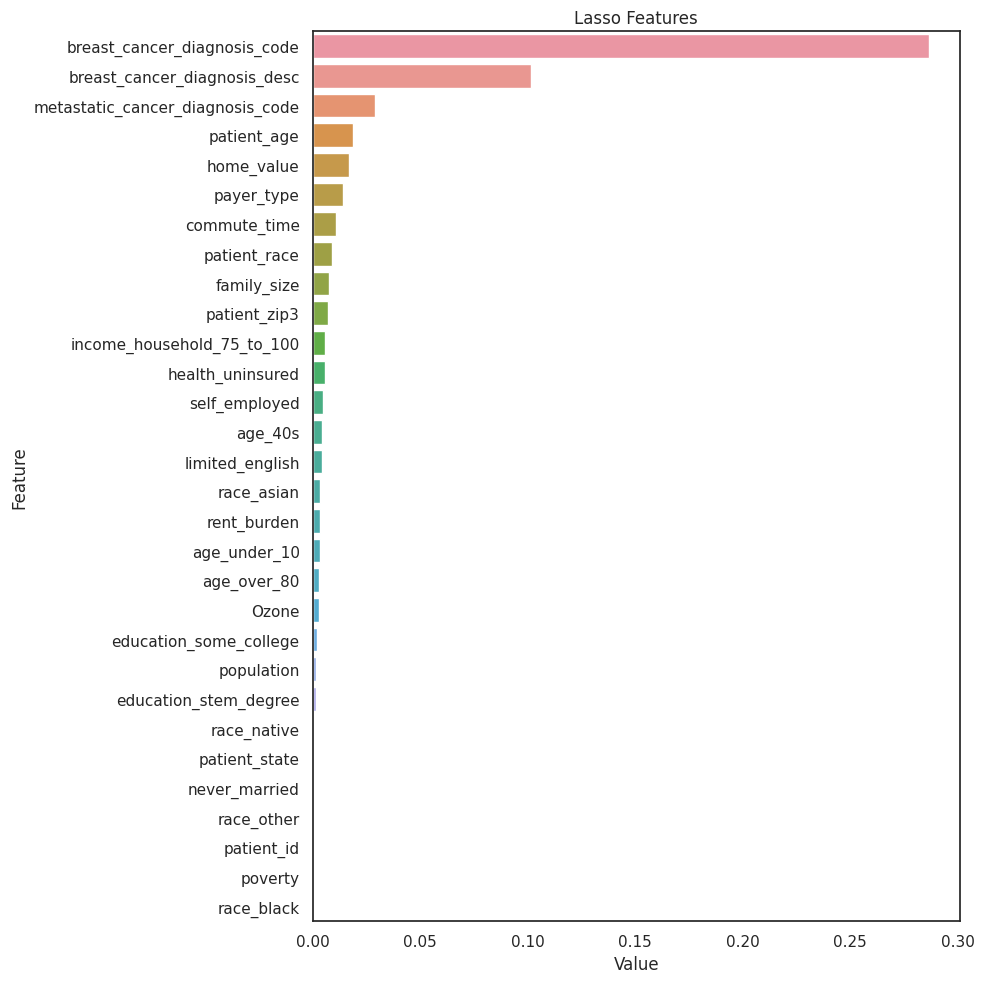

In [120]:
Feat_imp = pd.DataFrame(sorted(zip(Imp, Col_Num_Nam)), columns=['Value','Feature'])
Dat = Feat_imp.sort_values(by="Value", ascending=False)
Dat = Dat.iloc[0:30, :]
plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=Dat)
plt.title('Lasso Features')
plt.tight_layout()
plt.show()


## Model Development

   -  Model Training and Testing:
   
        - Gradient Boosting: **LightGBM**:
        
        - Decision Trees **Catboost**:



In [121]:
#splitting into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(Numer_OnCol_Sc, Tar_C, test_size = 0.2, random_state = 42)

In [79]:
#model training and testing
#Xgboost classifier
#xgboost_model = xgboost.XGBRegressor(n_estimators=156, learning_rate=0.0362306, max_depth=7, subsample=0.79983, colsample_bytree =0.7477) #gamma=0, subsample=0.75, colsample_bytree=0.4,
#xgboost_model.fit(X_train,y_train)
#Y_Predict = xgboost_model.predict(X_test)

In [122]:
cboost_model = catboost.CatBoostRegressor(learning_rate=0.0029, depth=9,min_data_in_leaf=5, l2_leaf_reg=0.23955, iterations = 1040,subsample=0.83819, verbose=False)
cboost_model.fit(X_train, y_train)
y_pred_cboost = cboost_model.predict(X_test)

In [80]:
#print(Y_Predict)
# Convert probabilities to binary predictions using a threshold of 0.5
#y_Bin_Pred = (Y_Predict >= 0.5).astype(int)
#print(y_Bin_Pred)

[0.83011955 0.7380633  0.8054496  ... 0.098942   0.88820314 0.08125135]
[1 1 1 ... 0 1 0]


In [123]:
print(y_pred_cboost)
# Convert probabilities to binary predictions using a threshold of 0.5
y_Bin_Pred_Cat = (y_pred_cboost >= 0.5).astype(int)
print(y_Bin_Pred_Cat)

[0.79873565 0.75037664 0.71088627 ... 0.1198979  0.85662921 0.13957699]
[1 1 1 ... 0 1 0]


# Generation of  predictions


In [81]:
# Make predictions
#Pred = xgboost_model.predict(TestDat_Sc)
#Pred

array([0.89734626, 0.71327496, 0.70154124, ..., 0.9618933 , 0.12514898,
       0.81135124], dtype=float32)

In [124]:
Pred_C = cboost_model.predict(TestDat_Sc)
Pred_C

array([0.80420827, 0.73152948, 0.78269533, ..., 0.85521293, 0.10162807,
       0.76103153])

In [125]:
# Create a DataFrame for submission
Submission = pd.DataFrame({'patient_id': BreastCancer_Test_Data['patient_id'], 'DiagPeriodL90D': Pred_C})

In [127]:
Submission.to_csv("submission1.csv", index=False)

In [84]:
#Submission.head()

,patient_id,DiagPeriodL90D
0,573710,0.897346
1,593679,0.713275
2,184532,0.701541
3,447383,0.831150
4,687972,0.772475


In [126]:
Submission.head()

,patient_id,DiagPeriodL90D
0,573710,0.804208
1,593679,0.731529
2,184532,0.782695
3,447383,0.806915
4,687972,0.816169
